In [1]:
# Importing Requierd Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob # To get name of files in a folder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

This public dataset was created by the Social Security Administration and contains all names from Social Security card applications for births that occurred in the United States after 1879. 

## Importing Dataset

In [2]:
files = glob('names/yob*')

In [3]:
# finding out the last and the first year of the dataset
fyear = files[0][-8:-4]
lyear = files[-1][-8:-4]
print('First Year: ', fyear)
print('Last Year: ', lyear)

First Year:  1880
Last Year:  2018


## Sample Dataset for Year 1880

In [4]:
df = pd.read_csv(files[0], delimiter=',' , names = ['Names','Gender', 'Count'])
df.head()

,Names,Gender,Count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


# Total Population Trend
From this dataset we can calculate total births every year and visualize the population trend

In [5]:
# creating a new customized dataframe 
total_pop = pd.DataFrame(columns=['Year','Population'])
total_pop

,Year,Population


In [6]:
for year in range(int(fyear), int(lyear) + 1):
    # updating a dataframe with the columns name 
    temp_df = pd.read_csv(files[year - int(fyear)], delimiter=',' , names = ['Names','Gender', 'Count'])
    # updating our customized dataframe as per our need 
    total_pop_new = pd.DataFrame({'Year' : [year], 'Population' : [temp_df['Count'].sum()]})
    total_pop = pd.concat([total_pop, total_pop_new])

In [7]:
total_pop

,Year,Population
0,1880,201484
0,1881,192696
0,1882,221533
0,1883,216944
0,1884,243461
...,...,...
0,2014,3698914
0,2015,3691990
0,2016,3657797
0,2017,3561975


Text(0.5, 1.0, 'Total Population Trend')

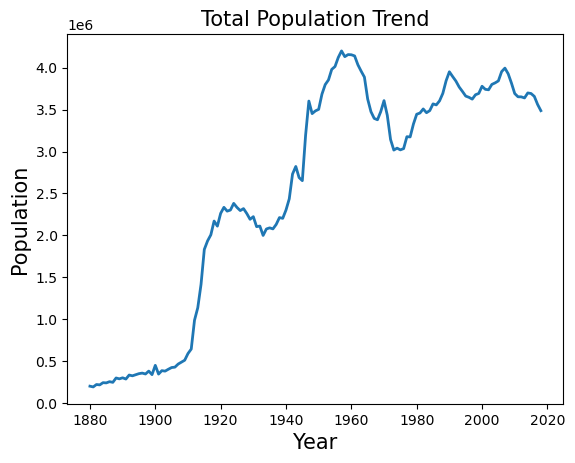

In [8]:
#Plotting the Population Trend
plt.plot(total_pop.Year, total_pop.Population, linewidth=2)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Total Population Trend', fontsize=15)

# Gender Based Population Trend
Now Suppose, we want to look at the trend of births based on Gender

In [9]:
gender_pop = pd.DataFrame(columns=['Year','Population','Gender'])

In [10]:
for year in range(int(fyear), int(lyear) + 1):
    temp_df = pd.read_csv(files[year - int(fyear)], delimiter=',' , names = ['Names','Gender', 'Count'])
    male = temp_df.groupby(['Gender']).sum('Count').loc['M'].values[0]
    female = temp_df.groupby(['Gender']).sum('Count').loc['F'].values[0]
    gender_pop_new = pd.DataFrame({'Year' : [year], 'Population' : female, 'Gender' : 'Female'})
    gender_pop = pd.concat([gender_pop, gender_pop_new])
    gender_pop_new = pd.DataFrame({'Year' : [year], 'Population' : male, 'Gender' : 'Male'})
    gender_pop = pd.concat([gender_pop, gender_pop_new])
gender_pop['Population']=gender_pop['Population'].astype('int')

Text(0.5, 1.0, 'Gender Based Population Trend')

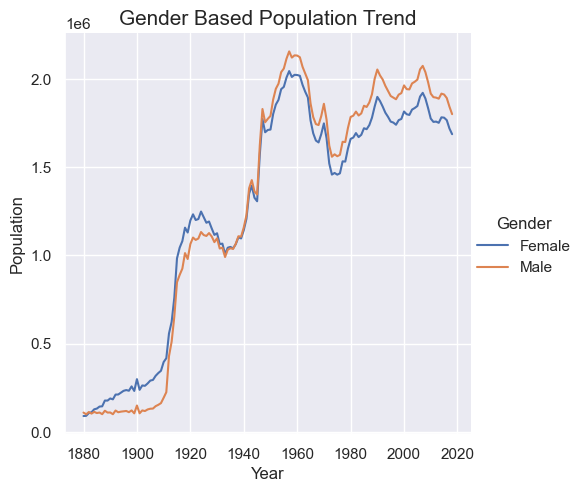

In [11]:
#Plotting Using Seaborn

sns.set_theme(style="darkgrid")
sns.relplot(x='Year',y='Population', hue = 'Gender', data=gender_pop, kind= 'line')
plt.title('Gender Based Population Trend', fontsize=15)

## Named based Population Trend

In [12]:
# Making DataFrame of the Names and Gender based year count
make_dic = False

if make_dic:
    
    names_df = pd.DataFrame(columns = ['Male','Female'])
    for k,file in enumerate(files):
        print(file, end='\r')
        temp_df = pd.read_csv(file, delimiter=',' , names = ['Names','Gender', 'Count'])
        for i in range(len(temp_df)):
            name = temp_df.loc[i,'Names']
            if name not in names_df.index:
                names_df.loc[name] = [np.zeros(len(files)), np.zeros(len(files))]

            if temp_df.loc[i,'Gender'] == 'M':
                temp_list = names_df.loc[name, 'Male']
                temp_list[k] = temp_df.loc[i,'Count']
               # names_df.loc[name, 'Male'] = temp_list

            else:
                temp_list = names_df.loc[name, 'Female']
                temp_list[k] = temp_df.loc[i,'Count']
                # names_df.loc[name, 'Female'] = temp_list
                
    # Saving to Dictionary
    names_df.to_json('names_df.json')

In [14]:
# Loading Saved Dictionary
testing_df = pd.read_json('names_df.json')
testing_df.index.name = 'Names'
testing_df.head()

,Male,Female
Names,,
Mary,"[27.0, 29.0, 30.0, 32.0, 36.0, 38.0, 32.0, 47....","[7065.0, 6919.0, 8148.0, 8012.0, 9217.0, 9128...."
Anna,"[12.0, 16.0, 0.0, 16.0, 20.0, 20.0, 15.0, 13.0...","[2604.0, 2698.0, 3143.0, 3306.0, 3860.0, 3994...."
Emma,"[10.0, 9.0, 7.0, 7.0, 9.0, 14.0, 11.0, 14.0, 1...","[2003.0, 2034.0, 2303.0, 2367.0, 2587.0, 2728...."
Elizabeth,"[9.0, 0.0, 7.0, 13.0, 16.0, 9.0, 11.0, 14.0, 1...","[1939.0, 1852.0, 2186.0, 2255.0, 2549.0, 2582...."
Minnie,"[9.0, 8.0, 10.0, 14.0, 0.0, 6.0, 8.0, 11.0, 14...","[1746.0, 1653.0, 2004.0, 2035.0, 2243.0, 2178...."


In [15]:
def name_plot(name_arr,gender = None):
    sns.set_theme(style='white')
    if gender == None:
        gender = 'Male'
        for name in name_arr:
            plt.plot(list(range(int(fyear), int(lyear) + 1)),testing_df.loc[name,gender],'-r',label = name + ' ' + gender, linewidth = 2)
        gender = 'Female'
        for name in name_arr:
            plt.plot(list(range(int(fyear), int(lyear) + 1)),testing_df.loc[name,gender],'--b',label = name + ' ' + gender, linewidth = 2)
    else:
        for name in name_arr:
            plt.plot(list(range(int(fyear), int(lyear) + 1)),testing_df.loc[name,gender],label = name)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Name Trend')
    plt.xlabel('Year')
    plt.ylabel('Baby Names')
    return plt.show()

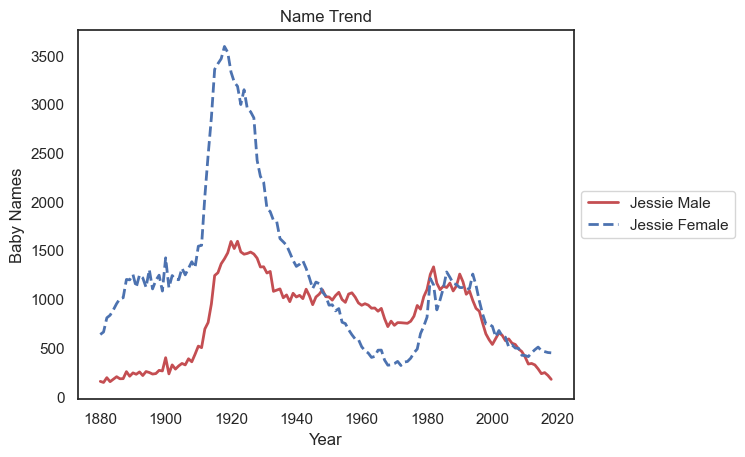

In [16]:
names = ['Jessie']
name_plot(names)

### Finding out if there is preference in last letter of names based on gender

In [17]:
alpha_df = pd.DataFrame(columns = ['Male', 'Female'])
for i in range(ord('a'),ord('z')+1):
    alpha_df.loc[chr(i)] = [0,0]

In [18]:
for name in testing_df.index:
    alpha_df.loc[name[-1], 'Male'] = alpha_df.loc[name[-1], 'Male'] + np.sum(testing_df.loc[name, 'Male'])
    alpha_df.loc[name[-1], 'Female'] = alpha_df.loc[name[-1], 'Female'] + np.sum(testing_df.loc[name, 'Female'])

In [19]:
alpha_df['Ratio'] = alpha_df['Female']/alpha_df['Male']

alpha_df['Log_Ratio'] = alpha_df['Ratio'].map(lambda x: abs(np.log(x)))

alpha_df['greater'] = alpha_df['Ratio'].map(lambda x: 'Female' if x >= 1 else 'Male')

### Defining custom color pallete for graphs

In [20]:
def custom_pallete(series):
    pal = []
    
    for i in series.values:
        if i > 1:
            pal.append('#FFBAE5')
        elif i < 1:
            pal.append('#99D8FC')
        else:
            pal.append('Yellow')
            
    return pal

C:\Users\patel\AppData\Local\Temp\ipykernel_19888\957330917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = alpha_df.index, y = 'Log_Ratio', data = alpha_df, palette=custom_pallete(alpha_df['Ratio']))


Text(0.5, 1.0, 'Ratio of Female : Male in logscale')

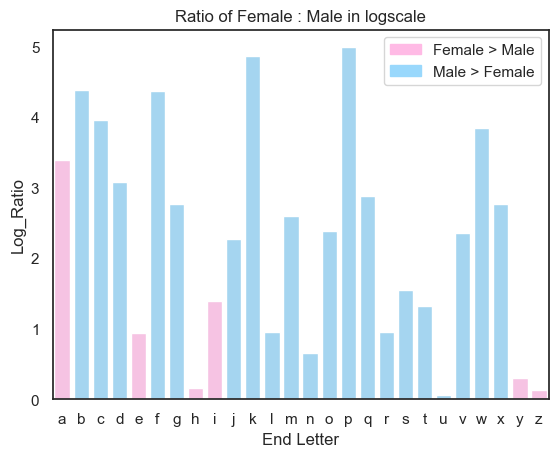

In [21]:
sns.barplot(x = alpha_df.index, y = 'Log_Ratio', data = alpha_df, palette=custom_pallete(alpha_df['Ratio']))
leg1 = mpatches.Patch(color='#FFBAE5', label='Female > Male')
leg2 = mpatches.Patch(color='#99D8FC', label='Male > Female')
plt.legend(handles=[leg1,leg2])
plt.xlabel('End Letter')
plt.title('Ratio of Female : Male in logscale')

## Finding and Plotting Trends of the 5 most trending name in USA

In [22]:
def rate(arr):
    last_arr = arr[-11:]
    
    total_trend = 0
    for i in range(1, len(last_arr)):
        trend = last_arr[i] - last_arr[i-1]
        total_trend += trend
        
    total_trend = total_trend / (len(last_arr) - 1)
    
    return total_trend

In [23]:
testing_df['Rate_Male'] = testing_df['Male'].map(lambda x : rate(x))
testing_df['Rate_Female'] = testing_df['Female'].map(lambda x : rate(x))
male_trending = testing_df['Rate_Male'].sort_values(ascending = True)[:5].index
female_trending = testing_df['Rate_Female'].sort_values(ascending = True)[:5].index

### 5 most trending Male names

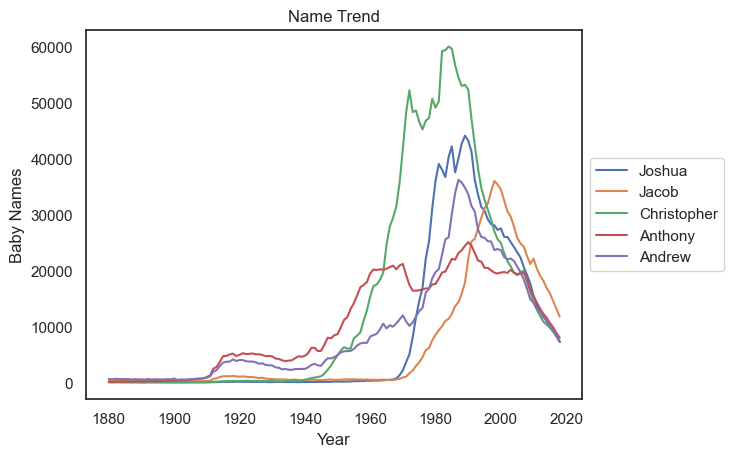

In [24]:
name_plot(male_trending,'Male')

### 5 most trending Female names

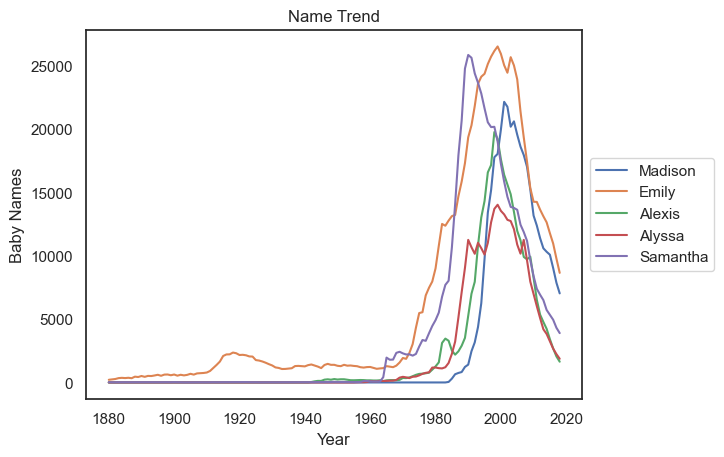

In [25]:
name_plot(female_trending,'Female')

## Finding Similar set of names from a keyword

In [26]:
def find_name(find_name, gender):
    names = testing_df.index
    found = []
    for name in names:
        if find_name.lower() in name.lower():
            found.append(name)

    found = testing_df.loc[found][gender].map(lambda x : np.sum(x)).sort_values(ascending = False)[:5].index
    return found

In [27]:
male_found = find_name('John', 'Male')
print(male_found)

Index(['John', 'Johnny', 'Johnnie', 'Johnathan', 'Johnathon'], dtype='object', name='Names')


In [28]:
female_found = find_name('Liz', 'Female')
print(female_found)

Index(['Elizabeth', 'Eliza', 'Lizzie', 'Lizbeth', 'Liza'], dtype='object', name='Names')


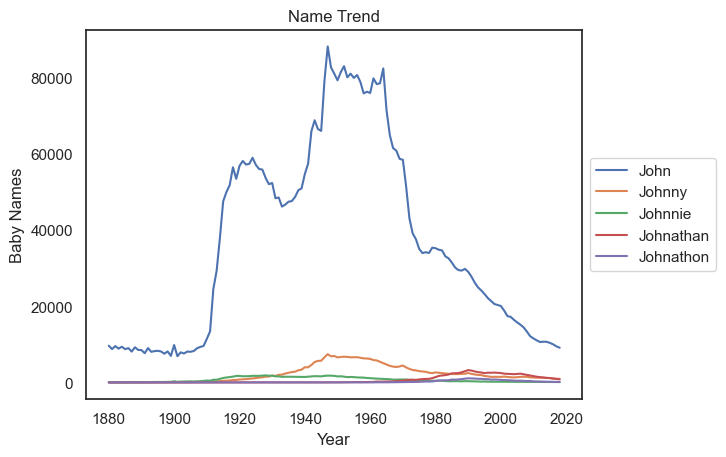

In [29]:
name_plot(male_found, 'Male')

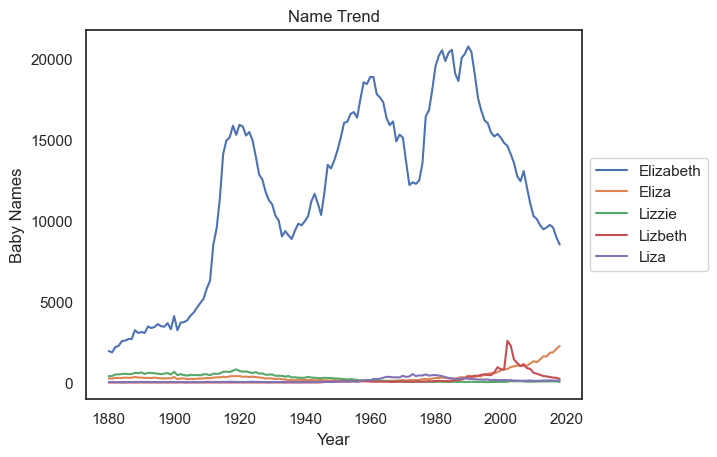

In [30]:
name_plot(female_found, 'Female')